<a href="https://colab.research.google.com/github/ovieimara/MATPMD4/blob/master/MATPMD4_Assignment1_3422868.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import networkx as nx
from graphviz import Digraph , Source
from IPython.display import Image

1. Question: Have you read and understood the instructions on the cover page?

   Answer: YES

2. Some stochastic process, with states labelled A,B,C,D,E, has the following transition matrix.

Answer: A stochastic matrix, also known as a probability matrix or transition matrix, is a square matrix that satisfies two important properties:

# Properties of a Stochastic Matrix
i. **Non_Negative**: All elements of the matrix are non-negative, i.e., p_ij ≥ 0 for all i and j. This means that each entry in the matrix represents a probability or a proportion, which cannot be negative.

ii. **Row sums equal 1**: The sum of each row in the matrix is equal to 1, i.e., ∑j=0 - j=∞ p_ij = 1. This ensures that the probabilities or proportions in each row add up to 100%, which is a fundamental property of probabilities.

Answer 2a: Using property 2, we can find x using the formula, P[3][0] + P[3][1] + P[3][2] + x = 1

In [58]:
x = 1 - (0.31 + 0.19 + 0.21 + 0.13)
x = round(x, 2) #round up to 2 decimal places
print(f"The value of x = {x}")
P = [
      [0.2, 0.1, 0.21, 0.02, 0.47],
      [0.0, 1.0, 0.0, 0.0, 0.0],
      [0.0, 0.0, 1.0, 0.0, 0.0],
      [0.31, 0.19, 0.21, x, 0.13],
      [0.22, 0.32, 0.08, 0.28, 0.10]
    ]

P = np.array(P)

The value of x = 0.16


2b. Assuming the initial distribution of states is A (13%), B (24%), C (32%), D (28%), and E (3%). calculate the distribution of states after 3 generations?

Before we proceed let's take a look at the transition state diagram.

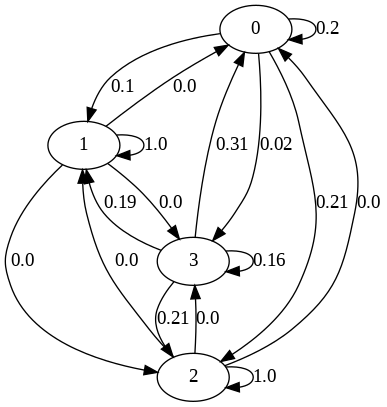

In [59]:
def renderStateDiagram(matrix):
  G = nx.MultiDiGraph( directed = True )
  for i in range(4):
    for j in range(4):
      G.add_edge(str(i) , str(j) , weight = matrix[i][j] )
  dot = Digraph()

  for u , v , d in G.edges( data = True ):
    dot.edge(u, v, label = str(d.get('weight' , '' )))

  src = Source(dot.source)
  src.format = 'png'
  return src

src = renderStateDiagram(P)
Image(src.render())

2b. The Chapman-Kolmogorov equation states that:

pi^n = pi(0) (P)^n.

where pi(0) = initial states distribution

n = n generations(steps) and

pi^n = distribution of states after n steps

(P) = transition matrix

(P)^n = transition matrix after n steps

In [60]:
n = 3
pi = [13/100, 24/100, 32/100, 28/100, 3/100]
sum(pi)
P_3 = np.linalg.matrix_power(P, 3)

#distribution of states after 3 generations?
pi_3 = np.dot(pi, P_3)
print(f"The distribution of states after 3 generations is {pi_3}")

The distribution of states after 3 generations is [0.0410418  0.40782248 0.480782   0.02813688 0.04221684]


After 3 generations, the system has a probability:

4.1% of been in state 1

40.% of been in state 2

48.1% of been in state 3

2.8% of been in state 4

4.2% of been in state 5

This means that after 3 generations the system is most likely to be state 3 with a probability of 48.1% followed next by state 2 with 40.8%.


2c. Rewrite P in the canonical form, clearly identifying R and Q.

Canonical form of P:

[

    [I, O],

    [R, Q]

]

n = size of square matrix
k = number of absorbing states
m = (n - k) number of transition steps

where,

I = identity matrix related to the absorbing states of size k

O = zero matrix of shape k x m

R = transitions from transient to absorbing states matrix of shape m x k

Q = transitions between transient states, matrix of shape m x m




In [61]:
#find absorbing_states
visited_states = []
def findAbsorbingStates(matrix):
  absorbing_states = []
  for i in range(len(matrix)):
    for j in range(len(matrix)):
      if i == j and matrix[i][j] == 1:
        absorbing_states.append((i, j))
        visited_states.append((i, j))

  return absorbing_states



In [62]:
absorbing_states = findAbsorbingStates(P)

In [63]:
def absorbingRows(m):
  return {x[0] for x in absorbing_states}

def absorbingCols(m):
  return {x[1] for x in absorbing_states}

absorbing_rows = absorbingRows(P)
absorbing_cols = absorbingCols(P)

In [64]:
#find transient to absorbing states
def find_R(matrix, absorbing_states):
  R = []
  for i in range(len(matrix)):
    row = []
    is_absorbing_row = False
    if i in absorbing_rows:
      is_absorbing_row = True

    if is_absorbing_row:
      continue

    for j in range(len(matrix)):
      is_absorbing_col = False
      if j in absorbing_cols:
        is_absorbing_col = True

      if not is_absorbing_col:
        continue

      row.append(matrix[i][j])
      visited_states.append((i, j))
    R.append(row)
  return R

find_R(P, absorbing_states)

[[0.1, 0.21], [0.19, 0.21], [0.32, 0.08]]

In [67]:
#find the transitions between transient states(Q)
def find_Q(matrix, visited_states):
  Q = []
  for i in range(len(matrix)):
    row = []
    is_absorbing_row = False
    if i in absorbing_rows:
      is_absorbing_row = True

    if is_absorbing_row:
      continue

    for j in range(len(matrix)):
      is_absorbing_col = False
      if j in absorbing_cols:
        is_absorbing_col = True

      if is_absorbing_col:
        continue

      if (i, j) not in visited_states:
        row.append(matrix[i][j])
    Q.append(row)
  return Q

find_Q(P, visited_states)

[[0.2, 0.02, 0.47], [0.31, 0.16, 0.13], [0.22, 0.28, 0.1]]

In [71]:
n = len(P)
k = len(absorbing_states)
m = n - k

R = find_R(P, absorbing_states)
Q = find_Q(P, visited_states)

#identity matrix
I = np.identity(k)
I

#zero matrix
zero = np.zeros((k, m))
zero

# horizontally stack I + Zero matrices
i_zero = np.hstack((I, zero))

#horizontally stack R + Q matrices
r_q = np.hstack((R, Q))

# vertically stack izero + r_q
canonical_form = np.vstack((i_zero, r_q))
print(canonical_form)



[[1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.  ]
 [0.1  0.21 0.2  0.02 0.47]
 [0.19 0.21 0.31 0.16 0.13]
 [0.32 0.08 0.22 0.28 0.1 ]]


d. For each state, i, calculate the mean number of times that the process is in a
transient state j, given it started in i.

N =
∞
∑
k=0
Qk = (I − Q)^−1 ,

N also referred to as the fundamental matrix.
N = (I - Q)^-1

In [77]:
N = np.linalg.inv(np.eye(len(Q)) - Q)
N


array([[1.62851117, 0.33855652, 0.89934733],
       [0.69612289, 1.3954141 , 0.56509066],
       [0.61465207, 0.51688709, 1.50675755]])

So, starting at state 1, we will spend 1.62851117 steps in state 1 and 0.33855652 steps in state 2 and 0.89934733 steps in state 3
before being absorbed

Starting in state 2 we will spend 0.69612289 steps in state 1, 1.3954141 steps in state 2 and 0.56509066
steps in state 3 before being absorbed

0.61465207, 0.51688709, 1.50675755
Starting in state 3 we will spend 0.61465207 steps in state 1, 0.51688709 steps in state 2 and 1.50675755 steps in state 3 before being absorbed



(e). For each state i, find the mean number of transitions before the process hits
an absorbing state, given that the process starts in a transient state i.

M = N Γ = (I − Q)−1 Γ

where: mean number of transitions before the process hits an absorbing state.

Γ = column vector containing 1s
N = stated above


In [81]:
#create column of ones
column_vector = np.ones((len(N), 1))

#calculate mean number of transitions
M = np.dot(N, column_vector)
print(f"The mean number of transitions before the process hits an absorbing state is {M}")


The mean number of transitions before the process hits an absorbing state is [[2.86641501]
 [2.65662765]
 [2.63829672]]


So, starting in state A, the process will hit an absorbing state, on
average, in 2.86641501 steps.

Starting in state B, it will hit an absorbing state in an average of 2.65662765 steps.

And finally, starting in state C, it will hit an absorbing state in an average of 2.63829672




(f). For each state i, find the probability of ending in each of the absorbing states.

For a Markov chain with absorbing states, the probability that the chain starting in a transient state i and will be in absorbing state j is
denoted by the matrix B whose elements, b(ij), are given by:

B = NR = (I - Q)^-1 * R

where:

B = probability of ending in each of the absorbing states

R = from above

In [84]:
B = np.dot(N, R)
print(f"The probability of ending in each of the absorbing states is {B}")


The probability of ending in each of the absorbing states is [[0.514968   0.485032  ]
 [0.51556998 0.48443002]
 [0.64183617 0.35816383]]


So starting in state A we get absorbed in state B with probability = 0.514968 and state C with probability of 0.485032

Starting in D we get absorbed in state B with probability of 0.51556998 and state C with probability of 0.48443002

Starting in E we get absorbed in state B with probability of 0.64183617, and state C with probability of 0.35816383